<a href="https://colab.research.google.com/github/denise-fi/Tarea2_2_IA/blob/main/ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('./housing.csv')
datos = df.dropna(subset=['total_bedrooms'])

In [4]:
datos = pd.get_dummies(datos, columns=['ocean_proximity'], drop_first=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
modelo = DecisionTreeRegressor(random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [8]:
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [11]:
r2


0.6688309933664495

In [12]:
rmse

67296.33003700843

[Text(0.5, 0.9, 'median_income <= 5.035\nsquared_error = 13236878438.883\nsamples = 16346\nvalue = 206644.4'),
 Text(0.25, 0.7, 'ocean_proximity_INLAND <= 0.5\nsquared_error = 8301156566.627\nsamples = 12881\nvalue = 173465.373'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'median_income <= 3.106\nsquared_error = 8097125491.339\nsamples = 8255\nvalue = 207809.942'),
 Text(0.0625, 0.3, 'median_income <= 2.512\nsquared_error = 5938283712.188\nsamples = 3600\nvalue = 170643.037'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'longitude <= -118.275\nsquared_error = 7872198601.375\nsamples = 4655\nvalue = 236553.414'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'median_income <= 3.036\nsquared_error = 2804248216.435\nsamples = 4626\nvalue = 112178.21'),
 Text(0.3125, 0.3, 'median_income <= 2.221\nsquared_error = 1547539555.904\nsamples = 2646\nvalue = 91077.286'),
 Text(0.28125, 0.1, '\n

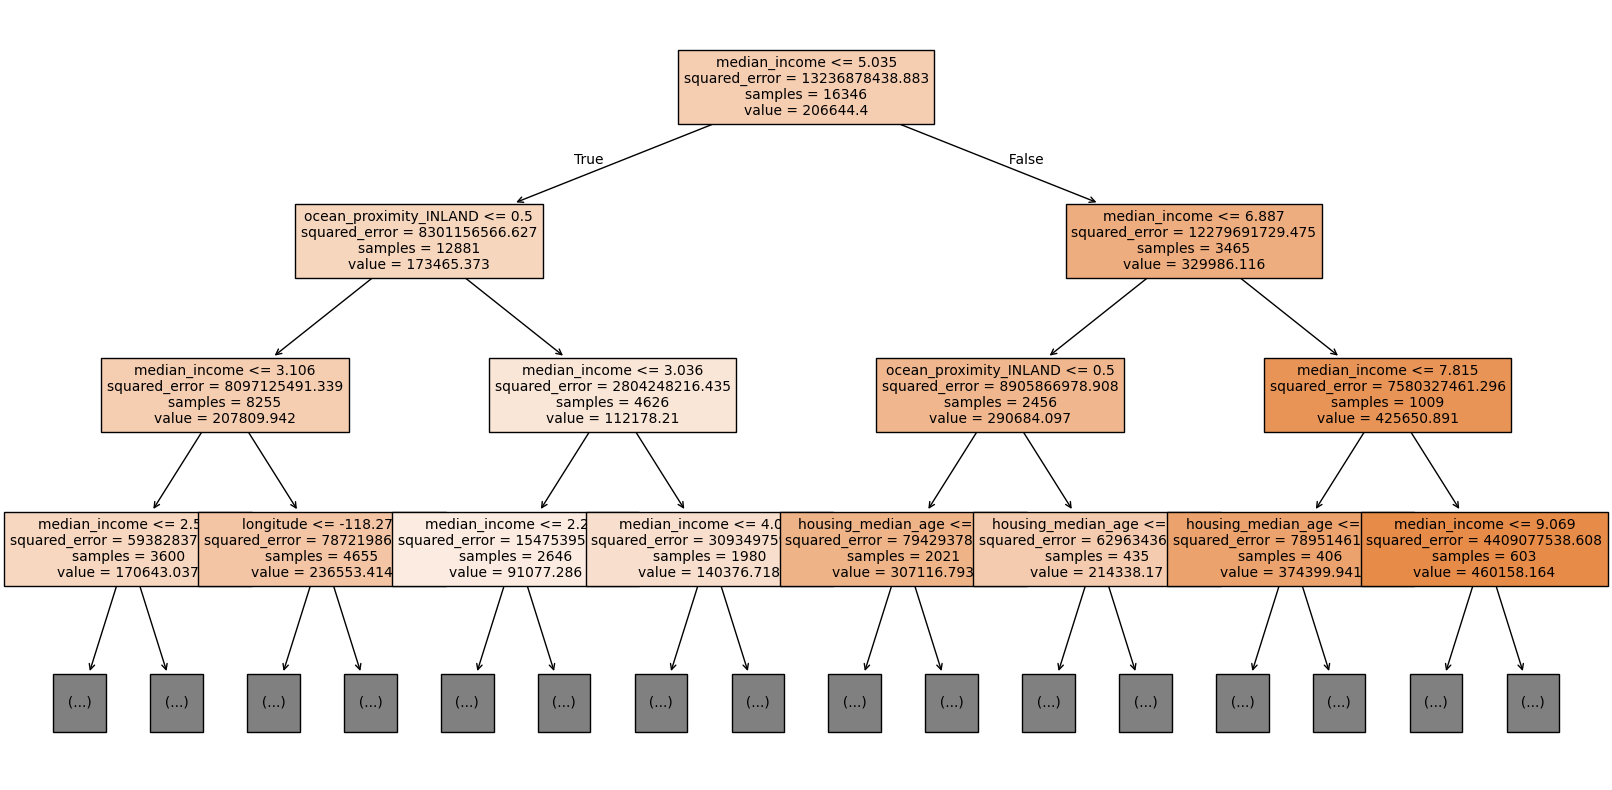

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(modelo, feature_names=X.columns, filled=True, max_depth=3, fontsize=10)

<Axes: >

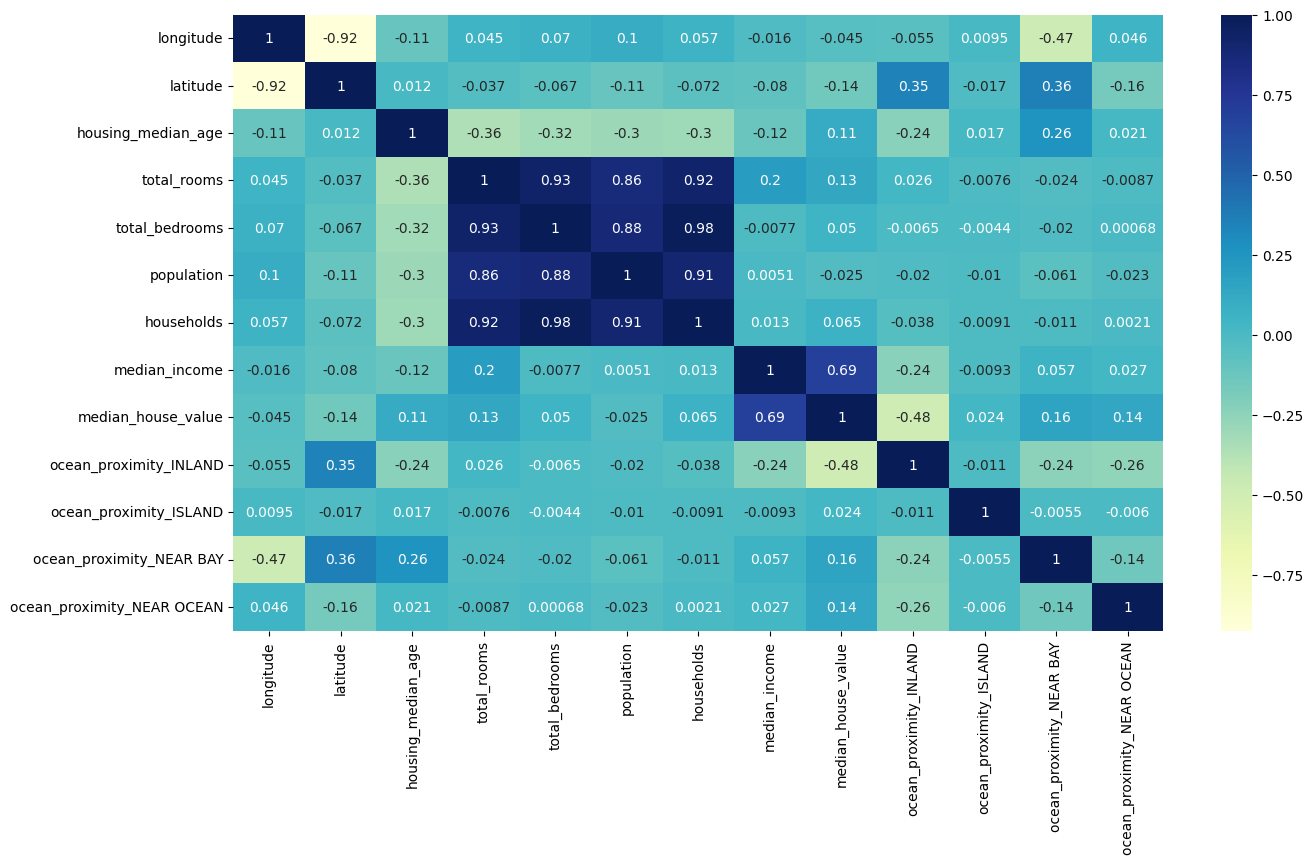

In [14]:
plt.figure(figsize=(15, 8))
sb.heatmap(datos.corr(), annot=True, cmap='YlGnBu')

Text(0, 0.5, 'Valor Medio de la Casa')

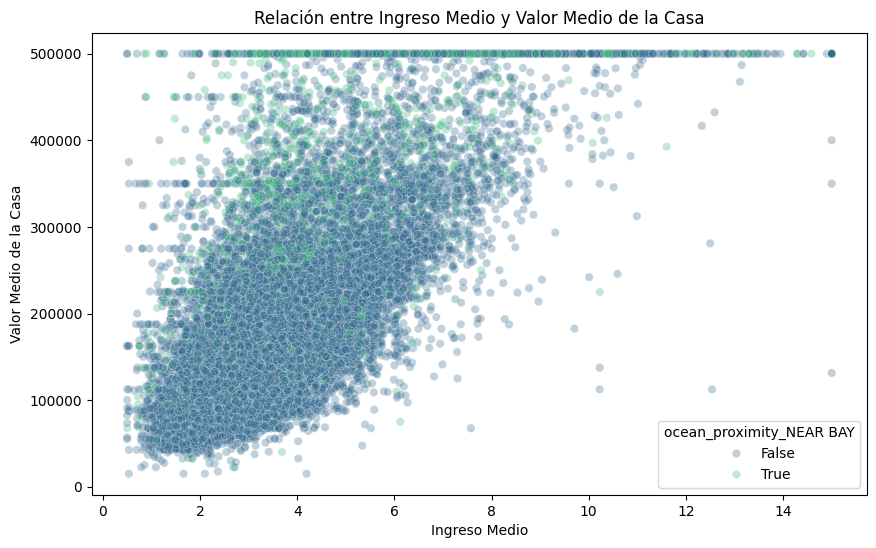

In [15]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=datos, x='median_income', y='median_house_value', alpha=0.3, hue='ocean_proximity_NEAR BAY', palette='viridis')
plt.title("Relación entre Ingreso Medio y Valor Medio de la Casa")
plt.xlabel("Ingreso Medio")
plt.ylabel("Valor Medio de la Casa")